# Connectance & degree distribution

https://poisotlab.github.io/EcologicalNetworks.jl/stable/

In [1]:
using EcologicalNetworks
using EcologicalNetworksPlots
using Plots
using Random
using Statistics
using Distributions

Random.seed!(42);

## Connectance

In [18]:
function B(n::Int64, p::Float64)
    return simplify(BipartiteNetwork(rand(Float64, (n,n)) .<= p))
end

B (generic function with 1 method)

In [19]:
B(10, 0.1)

8×7 bipartite  ecological network (Bool, String) (L: 10)

In [20]:
n = 250

250

In [27]:
P = rand(500)

500-element Array{Float64,1}:
 0.5263657094795438 
 0.9446393474280155 
 0.8191800594897347 
 0.7826960426539047 
 0.5725389356986399 
 0.07122015013829008
 0.7109143734757877 
 0.6233409343040597 
 0.8658557672748033 
 0.46946476154174666
 0.3496206541831892 
 0.1585459539016172 
 0.3591876615822245 
 ⋮                  
 0.8908435953852336 
 0.37406739570897063
 0.6351651162674106 
 0.7253448721187594 
 0.17166376228217106
 0.5382615147516283 
 0.35423973149089094
 0.6914516632906484 
 0.9871142035105684 
 0.4605677308345748 
 0.9288062231898211 
 0.14891595646883093

In [31]:
networks = [B(n,p) for p in P]

500-element Array{BipartiteNetwork{Bool,String},1}:
 250×250 bipartite  ecological network (Bool, String) (L: 32973)
 250×250 bipartite  ecological network (Bool, String) (L: 58995)
 250×250 bipartite  ecological network (Bool, String) (L: 51305)
 250×250 bipartite  ecological network (Bool, String) (L: 48755)
 250×250 bipartite  ecological network (Bool, String) (L: 35826)
 250×250 bipartite  ecological network (Bool, String) (L: 4457) 
 250×250 bipartite  ecological network (Bool, String) (L: 44264)
 250×250 bipartite  ecological network (Bool, String) (L: 38931)
 250×250 bipartite  ecological network (Bool, String) (L: 54130)
 250×250 bipartite  ecological network (Bool, String) (L: 29179)
 250×250 bipartite  ecological network (Bool, String) (L: 21965)
 250×250 bipartite  ecological network (Bool, String) (L: 9873) 
 250×250 bipartite  ecological network (Bool, String) (L: 22360)
 ⋮                                                              
 250×250 bipartite  ecological network

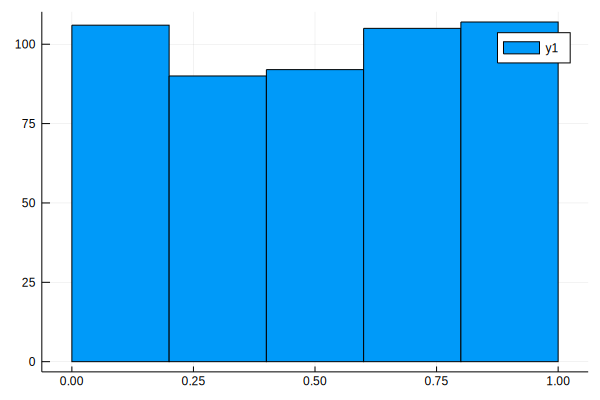

In [30]:
histogram(connectance.(networks))

In [32]:
K(N) = collect(values(degree(N)))

K (generic function with 1 method)

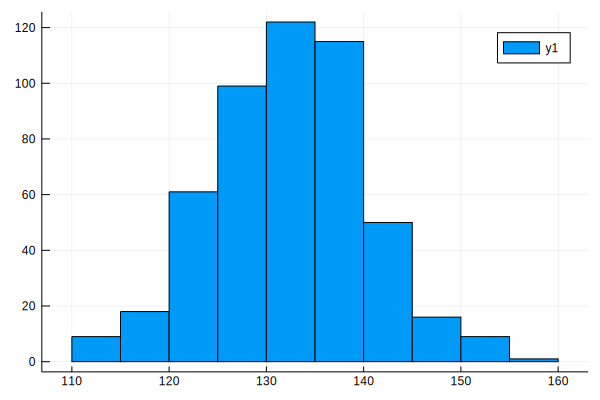

In [35]:
histogram(K(networks[1]))

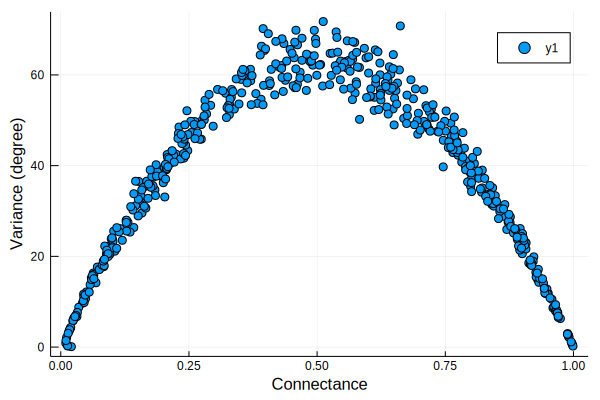

In [36]:
scatter(connectance.(networks), [var(K(n)) for n in networks])
xaxis!("Connectance")
yaxis!("Variance (degree)")

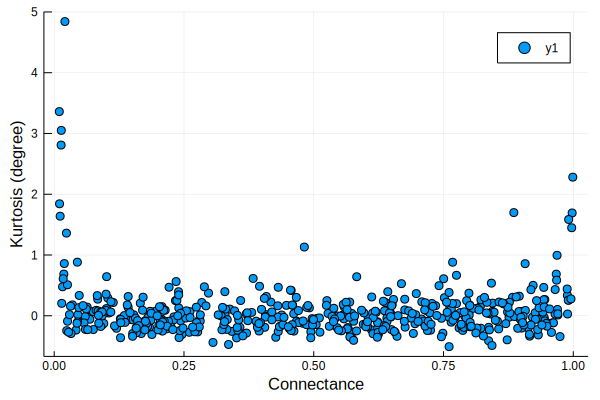

In [37]:
scatter(connectance.(networks), [kurtosis(K(n)) for n in networks])
xaxis!("Connectance")
yaxis!("Kurtosis (degree)")

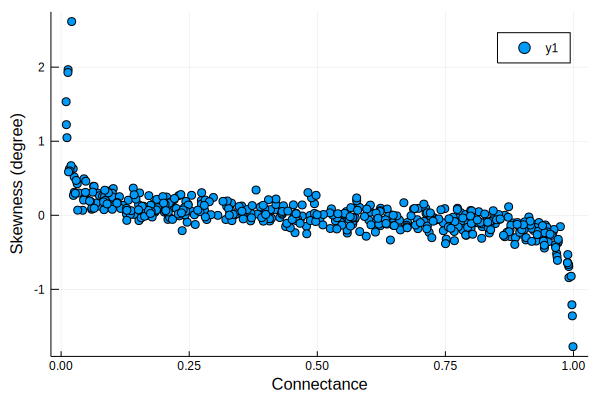

In [38]:
scatter(connectance.(networks), [skewness(K(n)) for n in networks])
xaxis!("Connectance")
yaxis!("Skewness (degree)")

## Degree

In [39]:
N = nz_stream_foodweb()[10]

96×96 unipartite  ecological network (Bool, String) (L: 634)

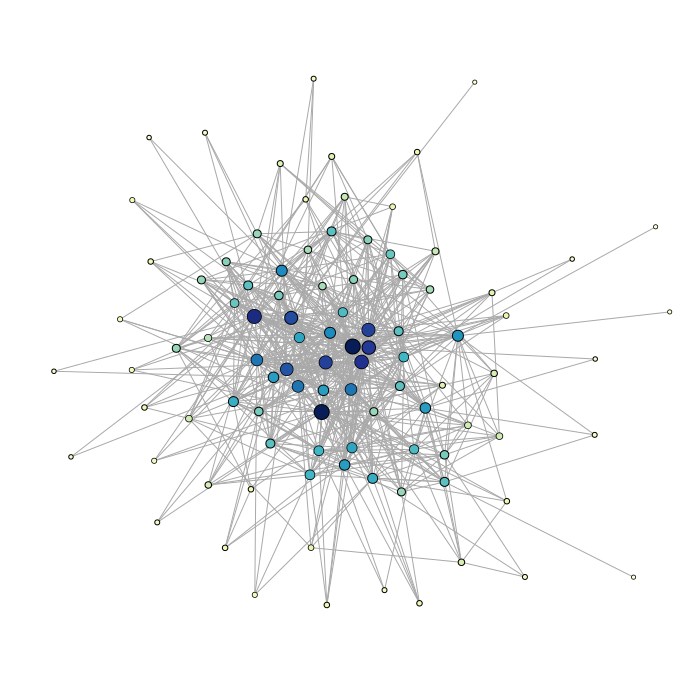

In [40]:
I = initial(RandomInitialLayout, N)
for step in 1:2000
  position!(ForceDirectedLayout(0.8), I, N)
end
plot(I, N, aspectratio=1, size=(700,700))
scatter!(I, N, nodefill=degree(N), nodesize=degree(N), mc=:YlGnBu)

In [ ]:
k = collect(values(degree(N)));
histogram(k; leg=false, c=:lightgrey)
xaxis!("Degree")

In [ ]:
degrees = collect(1:maximum(k))
p_degrees = zeros(Float64, length(degrees))
for (i, d) in enumerate(degrees)
    p_degrees[i] = sum(k .== d)/richness(N)
end

In [ ]:
scatter(degrees, p_degrees; leg=false)
xaxis!("k")
yaxis!("P(k)")

### Using the Lorenz curve

In [ ]:
function lorenz(N::T) where {T <: AbstractEcologicalNetwork}
    sp = collect(1:richness(N))./richness(N)
    k = sort(collect(values(degree(N))))
    lk = cumsum(k)./(2.0*links(N))
    return sp, lk
end

In [ ]:
N = web_of_life("M_PL_001")
plot(lorenz(N); leg=false, frame=:box, c=:black, aspectratio=1)
xaxis!((0,1), "Fraction of species")
yaxis!((0,1), "Cumulative fraction of interactions")